## K Nearest Neighbours

In [1]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,f1_score
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

### Data Science Workflow 
1. Identify business questions
 - Data is only as good as the questions you ask. Many organizations spend millions collecting data of all kinds from different sources, but many fail to create value from it. The truth is that no matter how much data your company owns or how many data scientists comprise the department, data only becomes a game-changer once you have identified the right business questions.
2. Collect and store data
- Now that you have a clear set of questions, it’s time to get your hands dirty. First, you need to collect and store your data in a safe place to analyze it.
- Sources: Company, Machine, open source data.
- Types: Qualitative or quantitative.
3. Clean and prepare data
- Once you’ve collected and stored your data, the next step is to assess its quality. It’s important to remember that the success of your data analysis depends greatly on the quality of your data. Your insights will be wrong or misleading if your information is inaccurate, incomplete, or inconsistent. That’s why spending time cleaning and preparing time is mandatory.  EDA processing.
4. Analyze data
- Now that your data looks clean, you’re ready to analyze data. Finding patterns, connections, insights, and predictions is often the most satisfying part of the data scientist's work. 
5. Visualize and communicate data
- The last step of the data science workflow is visualizing and communicating the results of your data analysis. To turn your insights into decision-making, you must ensure your audience and key stakeholders understand your work.

https://www.datacamp.com/blog/how-to-analyze-data-for-business

### K nearest Neighbours: 
- The k-nearest neighbors (k-NN) algorithm is a simple, instance-based learning algorithm used for classification and regression tasks in supervised machine learning. It is a non-parametric method that makes predictions based on the majority class or average value of the k-nearest neighbors of a given data point.
- How it works:

#### 1. Training Phase:
- In the training phase, the algorithm simply memorizes the training dataset. There is no explicit training involved as the model doesn't learn any parameters.

#### 2. Prediction Phase:
- When a prediction is needed for a new data point, the algorithm calculates the distances between the new data point and all the points in the training dataset. The most common distance metric used is the Euclidean distance, but other distance metrics can also be used.
- The algorithm then selects the k-nearest neighbors (data points with the smallest distances) to the new data point.

#### 3. Classification Task:
- For classification tasks, the algorithm assigns the class label that appears most frequently among the k-nearest neighbors to the new data point. This is known as the majority voting scheme.

#### 4. Regression Task:
- For regression tasks, the algorithm calculates the average value of the target variable among the k-nearest neighbors and assigns it as the predicted value for the new data point. 

#### 5. Choosing the Value of k:
- The value of k, the number of neighbors to consider, is a hyperparameter that needs to be specified before applying the algorithm.
- The choice of k can significantly impact the performance of the algorithm. A smaller value of k tends to be more sensitive to noise, while a larger value of k may lead to smoother decision boundaries but could potentially miss local patterns in the data.

#### 6. Evaluation:
- The performance of the k-NN algorithm can be evaluated using various metrics such as accuracy, precision, recall, F1 score, or mean squared error, depending on whether it is applied to classification or regression tasks.

Source: ChatGpt Prompt.

### Data Preparation

dataset Link: https://www.kaggle.com/datasets/sriharshaeedala/financial-fraud-detection-dataset

In [2]:
# Load data
df = pd.read_csv('../data/Synthetic_Financial_datasets_log.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df.shape

(6362620, 11)

In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
fraud_flagged_not_fraud=df.query("isFraud == 1 and isFlaggedFraud ==0")
fraud_flagged_not_fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [8]:
fraud_flagged_not_fraud.shape[0]

8197

### Feature Engineerings

In [11]:
# Will keep column type for this analysis.
df.drop(columns=['nameOrig','nameDest'],axis=1,inplace=True)

In [9]:
df['nameDest'].value_counts()

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: count, Length: 2722362, dtype: int64

In [ ]:
df['nameDest'].value_counts().sum()

KeyError: 'type'

In [12]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,False,False,True,False
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,False,False,True,False
2,1,181.00,181.0,0.00,0.0,0.0,1,0,False,False,False,True
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,True,False,False,False
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,False,False,True,False


In [14]:
# get correlation
df.corr(numeric_only=True)['isFraud'].sort_values(ascending=False)

isFraud           1.000000
amount            0.076688
type_TRANSFER     0.053869
isFlaggedFraud    0.044109
step              0.031578
type_CASH_OUT     0.011256
oldbalanceOrg     0.010154
newbalanceDest    0.000535
type_DEBIT       -0.002911
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
type_PAYMENT     -0.025697
Name: isFraud, dtype: float64

In [15]:
loans_df= df.drop('isFlaggedFraud',axis=1)

X = loans_df.drop('isFraud',axis=1)
y= loans_df['isFraud']

In [16]:
loans_df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

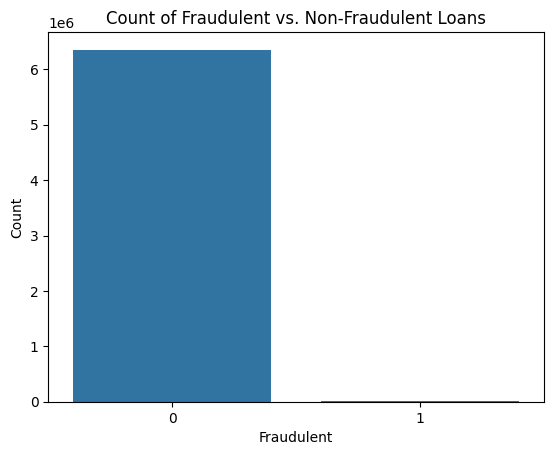

In [17]:
sns.countplot(x='isFraud', data=loans_df)
# Customize the plot
plt.xlabel('Fraudulent')
plt.ylabel('Count')
plt.title('Count of Fraudulent vs. Non-Fraudulent Loans')
plt.show()

Our data is clearly imbalanced, We have to find a way to make it balanced for analysis

### Perform Oversampling technique

In [18]:
# Before oversampling
loans_df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [19]:
smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X,y)

# Join the values
oversampled_loans = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['isFraud'])], axis=1)



In [20]:
# Recheck after oversampling
oversampled_loans['isFraud'].value_counts()

isFraud
0    6354407
1    6354407
Name: count, dtype: int64

### Perform Train test split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

In [22]:
# Fitting and evaluating the model
knn = KNeighborsClassifier(n_neighbors=3)
#knn.fit(X_train,y_train)
#y_pred = knn.predict(X_test)

In [ ]:
# Evaluate the model
#train_accuracy = knn.score(X_train, y_train)
#test_accuracy = knn.score(X_test, y_test)

#print("Training Accuracy:", train_accuracy)
#print("Test Accuracy:", test_accuracy)

I will continue with down sampling technique

In [23]:
majority_class = loans_df[loans_df['isFraud'] == 0]
minority_class = loans_df[loans_df['isFraud'] == 1]

# Downsample the majority class to match the minority class
majority_downsampled = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)

downsampled_loans= pd.concat([majority_downsampled,minority_class])


In [24]:
# check the shape
print(f'Downsampled Loans: {downsampled_loans.shape}')
print(f'Downsampled Loans Count: {downsampled_loans['isFraud'].value_counts()}')

Downsampled Loans: (16426, 11)
Downsampled Loans Count: isFraud
0    8213
1    8213
Name: count, dtype: int64


In [25]:
# Split, train and predict
X= downsampled_loans.drop('isFraud',axis=1)
y = downsampled_loans['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [26]:
train_accuracy = knn.score(X_train, y_train)
test_accuracy = knn.score(X_test, y_test)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.9773211567732115
Test Accuracy: 0.963481436396835


In [27]:

f1 = f1_score(y_test,y_pred)
cls_report = classification_report(y_test,y_pred)
print(f'F1 Score: {f1}')

print(f'Classification Report: {cls_report}')

F1 Score: 0.9635701275045537
Classification Report:               precision    recall  f1-score   support

           0       0.97      0.96      0.96      1649
           1       0.96      0.97      0.96      1637

    accuracy                           0.96      3286
   macro avg       0.96      0.96      0.96      3286
weighted avg       0.96      0.96      0.96      3286



## Hyperparameters Tuning

In [28]:
parameters= {
    'n_neighbors':range(1,11),
    'weights':['uniform','distance'],
    'metric':['minkowski','manhattan','euclidean']
}
grid = GridSearchCV(estimator=knn,param_grid=parameters,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)

print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'metric': 'minkowski', 'n_neighbors': 4, 'weights': 'distance'}
0.9582191780821917
KNeighborsClassifier(n_neighbors=4, weights='distance')


dataset Link: https://www.kaggle.com/datasets/sriharshaeedala/financial-fraud-detection-dataset